## Link to Github repo: https://github.com/fulmidae/dsci100-project-individual 

In [1]:
# Libraries!
library(tidyverse)
library(tidymodels)
library(repr)
library(scales)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
── Attaching packages ────────────────────────────────────── tidymodels 1.1.1 ──

✔ broom        1.0.6     ✔ rsample      1.2.1
✔ dials        1.3.0     ✔ tune         1.1.2
✔ infer        1.0.7     ✔ workflows    1.1.4
✔ modeldata    1.4.0     ✔ workflowsets 1.0.1
✔ parsnip      1.2.1     ✔ yardstick    1.3.1
✔ recipes      1.1.0     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filt

In [2]:
# Import data sheets from Github
# omg this took me way too long to figure 

# Yes apparently the files need to be RAWWWW
players_url = 'https://raw.githubusercontent.com/fulmidae/dsci100-project-individual/refs/heads/main/data/players.csv'
sessions_url = 'https://raw.githubusercontent.com/fulmidae/dsci100-project-individual/refs/heads/main/data/sessions.csv'

players <- read_csv(players_url)
# players

sessions <- read_csv(sessions_url) 
# sessions

players_tidy <- players |> 
    rename(age = Age) # why is age capitalized...? renames the 'Age' column to 'age'

players_tidy

sessions


Rows: 196 Columns: 7
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (4): experience, hashedEmail, name, gender
dbl (2): played_hours, Age
lgl (1): subscribe

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
Rows: 1535 Columns: 5
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (3): hashedEmail, start_time, end_time
dbl (2): original_start_time, original_end_time

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


experience,subscribe,hashedEmail,played_hours,name,gender,age
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47


hashedEmail,start_time,end_time,original_start_time,original_end_time
<chr>,<chr>,<chr>,<dbl>,<dbl>
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,30/06/2024 18:12,30/06/2024 18:24,1.71977e+12,1.71977e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,17/06/2024 23:33,17/06/2024 23:46,1.71867e+12,1.71867e+12
f8f5477f5a2e53616ae37421b1c660b971192bd8ff77e3398304c7ae42581fdc,25/07/2024 17:34,25/07/2024 17:57,1.72193e+12,1.72193e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,25/07/2024 03:22,25/07/2024 03:58,1.72188e+12,1.72188e+12
36d9cbb4c6bc0c1a6911436d2da0d09ec625e43e6552f575d4acc9cf487c4686,25/05/2024 16:01,25/05/2024 16:12,1.71665e+12,1.71665e+12
bfce39c89d6549f2bb94d8064d3ce69dc3d7e72b38f431d8aa0c4bf95ccee6bf,23/06/2024 15:08,23/06/2024 17:10,1.71916e+12,1.71916e+12
fd6563a4e0f6f4273580e5fedbd8dda64990447aea5a33cbb5e894a3867ca44d,15/04/2024 07:12,15/04/2024 07:21,1.71317e+12,1.71317e+12
ad6390295640af1ed0e45ffc58a53b2d9074b0eea694b16210addd44d7c81f83,21/09/2024 02:13,21/09/2024 02:30,1.72688e+12,1.72689e+12
96e190b0bf3923cd8d349eee467c09d1130af143335779251492eb4c2c058a5f,21/06/2024 02:31,21/06/2024 02:49,1.71894e+12,1.71894e+12


In [3]:
# Begin players data analysis

# Number of rows (observations)
observation_count <- nrow(players_tidy)

# Number of columns (variables) 
variable_count <- ncol(players_tidy)

count_tibble <- tibble(observation_count, variable_count)
count_tibble

# Summary Statistics

# Number of players by experience
xp_stat <- players_tidy |>
    group_by(experience) |>
    summarize(count = n()) 
    #|> mutate(percentage = format(round( count / sum(count) * 100, 2 ), nsmall = 2))

xp_stat

# Number of players by subscription status
subscription_stat <- players_tidy |>
    group_by(subscribe) |>
    summarize(count = n()) 
    #|> mutate(percentage = count / sum(count) * 100)

subscription_stat

# Number of players by gender identity
gender_stat <- players_tidy |>
    group_by(gender) |>
    summarize(count = n()) 
    # |> mutate(percentage = count / sum(count) * 100 |> round(digits = 2))

gender_stat

# Begin sessions data analysis
# sessions_mutated <- sessions |>
#    mutate(playtime = original_end_time - original_start_time)

# sessions_mutated

# sessions_summary <- sessions_mutated |> 
#    group_by(hashedEmail) |>
#    summarize(count = sum(playtime))
# sessions_summary
# Total playtime of each player
    

observation_count,variable_count
<int>,<int>
196,7


experience,count
<chr>,<int>
Amateur,63
Beginner,35
Pro,14
Regular,36
Veteran,48


subscribe,count
<lgl>,<int>
FALSE,52
TRUE,144


gender,count
<chr>,<int>
Agender,2
Female,37
Male,124
Non-binary,15
Other,1
Prefer not to say,11
Two-Spirited,6


## 1. Data Description

For the players.csv data set:
- There are a total of 196 observations.
- There are 7 variables for each observation.

The 7 variables are: 
- experience (character), the skill level of the player 
- subscribe (logical), whether the player is subscribed to the newsletter
- hashedEmail (character), the hashed email address of the player (used for identification in sessions.csv)
- played_hours (double), how many hours the person has played on the server
- name (character), the name of the player
- gender (character), the gender identity of the player
- age (character), the age of the player

This data table looks tidy. Each row corrspondends to one player (observation) and each column corresponds to one variable. Most data from variables (except played_hours) are probably collected during registration. The played_hours data probably comes from logged information on servers.

For the sessions.csv data set:
- There are a total of 1535 observations, with 5 variables.

The 5 variables are: 
- hashedEmail (character), the hashed email address of the player
- start_time (character), the start time of the session in a human-readable format
- end_time (character), the end time of the session in a human-readable format
- original_start_time (double), the start time of the session as stored by a computer
- original_end_time (double), the end time of the session as stored by a computer


The data set also looks tidy. I would assume that this data set was collected One big problem I found is that the original_start_time and original_end_time are stored as rounded integers. What happens is if I subtract original_start_time from original_end_time to attempt to find how long each session was, the resulting playtime is often 0! This greatly reduces the utility of those two columns. 

## 2. Question

The broad question that I'd love to address is **Question 1**: _What player characteristics and behaviours are more predictive of subscribing to a game-related newsletter, and how do these features differ between various player types?_

Specifically, I'd like to find out if the _amount of hours played by a new player, as well as the age of the player, can predict whether they are subscribed to the game-related newsletter using data from players.csv_. 

This data is already well-suited to perform this analysis without much modification (it contains subscription status, hours played, and age as tidy columns). However, if we would like to be more thorough, and include sessions.csv as well, we should mutate a new column and calculate how long each individual session is. Since there is a hashed email variable, we can also summarize each player's playtime on the server, and include this as another column of data on players.csv as extra consideration. 

In [4]:
# Begin players data analysis (2) and visualization

# Averages of Numeric Variables (played hours & age) in players.csv
print('Averages of Numeric Variables: ') 
num_avg <- players_tidy |>
    summarize(
        avg_played_hours = mean(played_hours), 
        avg_age = mean(age, na.rm = TRUE)
        )

num_avg


[1] "Averages of Numeric Variables: "


avg_played_hours,avg_age
<dbl>,<dbl>
5.845918,21.13918


## 3. Exploratory Data Analysis

From the output above, we can see that: 
- The average player played for 5.85 hours on the server.
- The average age of the players is 21.14 years.

From the graphs below, we can also conclude: 
- More dedicated players (those that have at least 10 hours played) are most likely to subscribe to the newsletter.
- Younger players (<30 yrs) are more likely to subscribe to the newsletter than older players (>30 yrs).


Warning message in scale_y_log10():
“log-10 transformation introduced infinite values.”
Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_point()`).”


experience,subscribe,hashedEmail,played_hours,name,gender,age,age_group
<chr>,<lgl>,<chr>,<dbl>,<chr>,<chr>,<dbl>,<fct>
Pro,TRUE,f6daba428a5e19a3d47574858c13550499be23603422e6a0ee9728f8b53e192d,30.3,Morgan,Male,9,0
Veteran,TRUE,f3c813577c458ba0dfef80996f8f32c93b6e8af1fa939732842f2312358a88e9,3.8,Christian,Male,17,1
Veteran,FALSE,b674dd7ee0d24096d1c019615ce4d12b20fcbff12d79d3c5a9d2118eb7ccbb28,0.0,Blake,Male,17,1
Amateur,TRUE,23fe711e0e3b77f1da7aa221ab1192afe21648d47d2b4fa7a5a659ff443a0eb5,0.7,Flora,Female,21,2
Regular,TRUE,7dc01f10bf20671ecfccdac23812b1b415acd42c2147cb0af4d48fcce2420f3e,0.1,Kylie,Male,21,2
Amateur,TRUE,f58aad5996a435f16b0284a3b267f973f9af99e7a89bee0430055a44fa92f977,0.0,Adrian,Female,17,1
Regular,TRUE,8e594b8953193b26f498db95a508b03c6fe1c24bb5251d392c18a0da9a722807,0.0,Luna,Female,19,1
Amateur,FALSE,1d2371d8a35c8831034b25bda8764539ab7db0f63938696917c447128a2540dd,0.0,Emerson,Male,21,2
Amateur,TRUE,8b71f4d66a38389b7528bb38ba6eb71157733df7d1740371852a797ae97d82d1,0.1,Natalie,Male,47,4


age_group,true
<fct>,<int>
0,1
1,75
2,61
3,1
4,3
5,1
NA,2


age_group,false
<fct>,<int>
1,22
2,21
3,4
4,3
5,2


Joining with `by = join_by(age_group)`


age_group,true,false
<fct>,<int>,<int>
0,1,NA
1,75,22
2,61,21
3,1,4
4,3,3
5,1,2
NA,2,NA


age_group,is_subscribed,count
<fct>,<fct>,<int>
0,true,1
0,false,NA
1,true,75
1,false,22
2,true,61
2,false,21
3,true,1
3,false,4
4,true,3


Warning message:
“Removed 2 rows containing missing values or values outside the scale range
(`geom_bar()`).”


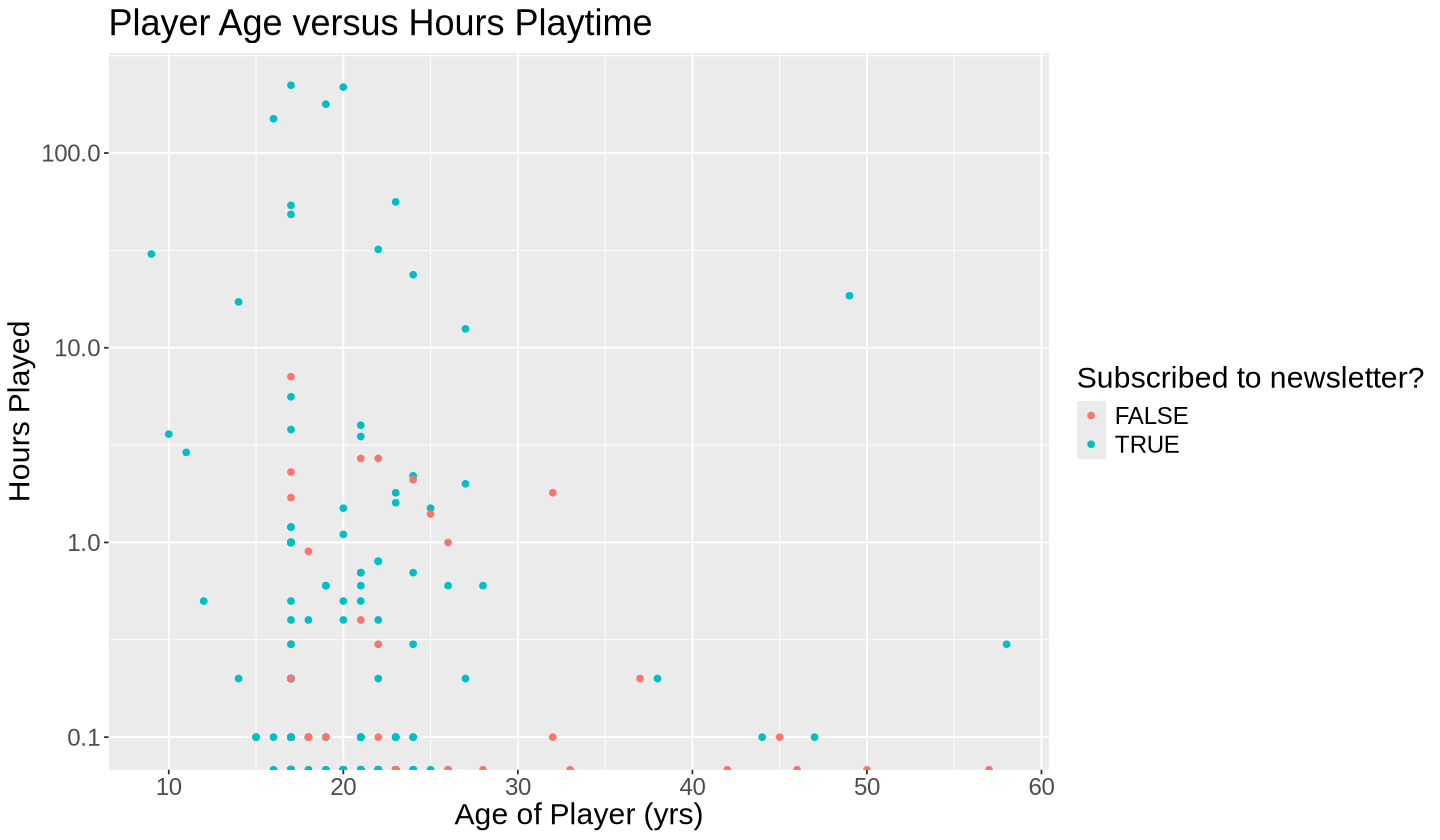

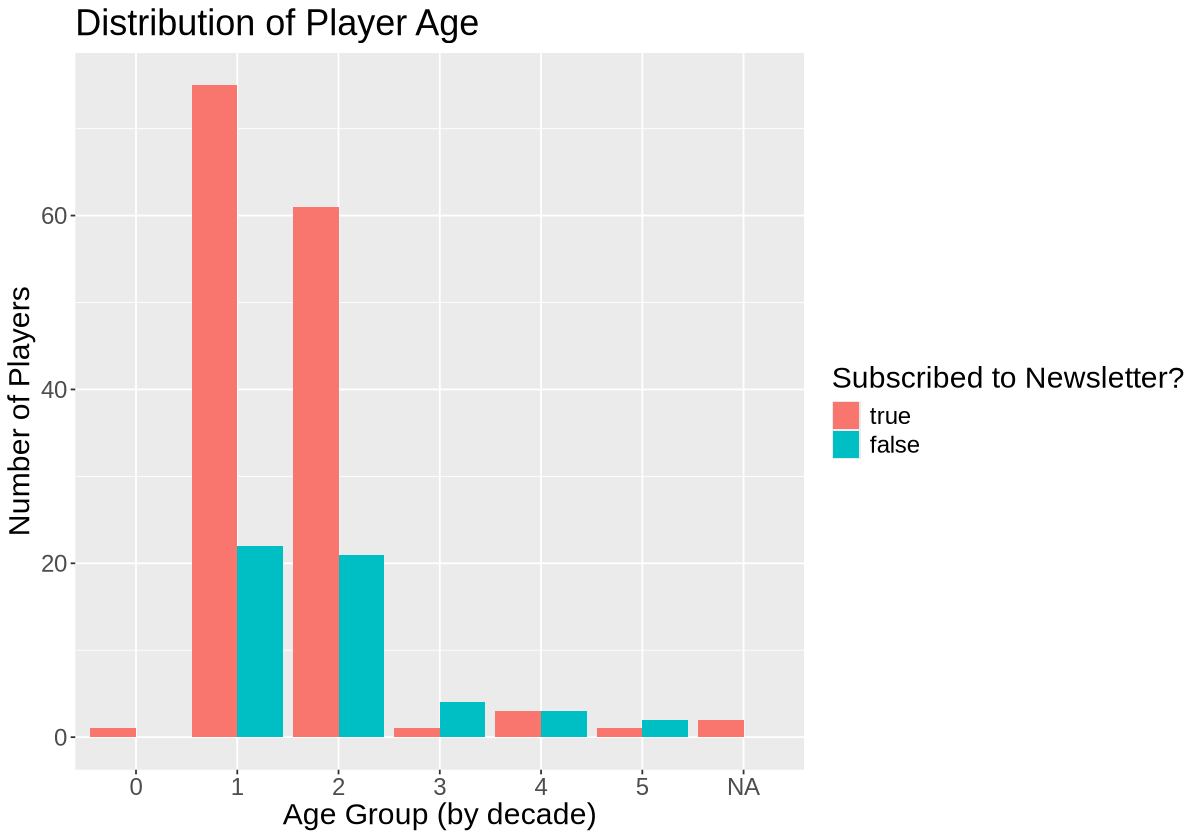

In [54]:
# Exploratory graphs

options(repr.plot.length = 8, repr.plot.width = 12)

# Scatterplot, plotting our two explanatory variables on the x and y axis. Colour represents subscription status of the particular person.
scatterplot <- players_tidy |>
    ggplot(aes(x = age, y = played_hours, color = subscribe), na.rm = TRUE) +
    geom_point() + 
    labs(x = 'Age of Player (yrs)', y = 'Hours Played', color = 'Subscribed to newsletter?', title = 'Player Age versus Hours Playtime') + 
    scale_y_log10() + 
    theme(text = element_text(size = 18))

scatterplot

players_age_group <- players_tidy |>
    # Classifies players into different age groups, which is the first digit of their age. (Those between 0 and 9 are assigned 0)
    mutate(age_group = as_factor((age - age %% 10) / 10))

players_age_group

true_subscribers <- players_age_group |>
    filter(subscribe == TRUE) 

false_subscribers <- players_age_group |>
    filter(subscribe == FALSE)

# true_subscribers

# false_subscribers

true_subscriber_count <- true_subscribers |>
    group_by(age_group) |>
    summarize(true = n())

true_subscriber_count

false_subscriber_count <- false_subscribers |>
    group_by(age_group) |>
    summarize(false = n())

false_subscriber_count

subscriber_count <- true_subscriber_count |>
    full_join(false_subscriber_count)

subscriber_count

# Okay, I can't figure out how to do this, but I'd like to somehow combine those two graphs together into one of them, 
# which would be a much better representation of the proportion of players who are subscribed versus not subscribed.

# THANK YOU ANONYMOUS PERSON ON PIAZZA ILY

# I need to use pivot_longer for this dataset to be compatible with my visualization.

subscriber_long <- subscriber_count |>
    pivot_longer(
        cols = true:false, 
        names_to = 'is_subscribed',
        values_to = 'count', 
    ) |>
    mutate(is_subscribed = as_factor(is_subscribed))

subscriber_long

options(repr.plot.length = 6, repr.plot.width = 10)

subscriber_viz <- subscriber_long |>
    ggplot(aes(x = age_group, y = count, fill = is_subscribed)) + 
    geom_bar(stat = 'identity', position = 'dodge') + 
    labs(x = 'Age Group (by decade)', y = 'Number of Players', fill = 'Subscribed to Newsletter?', title = 'Distribution of Player Age') +
    theme(text = element_text(size = 18))
    
subscriber_viz
    


